In [221]:
# Load Libraries

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

#Remove warnings 
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [222]:
#Import data

ticker = "ETH-USD"             #Change to any Yahoo ticker https://finance.yahoo.com/
start = "2016-01-01"
end = datetime.datetime.now()

df1 = pdr.get_data_yahoo(ticker, start, end)
#df.reset_index(inplace=True)
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,329.451996,307.056000,308.644989,320.884003,893249984,320.884003
2017-11-10,324.717987,294.541992,320.670990,299.252991,885985984,299.252991
2017-11-11,319.453003,298.191986,298.585999,314.681000,842300992,314.681000
2017-11-12,319.153015,298.513000,314.690002,307.907990,1613479936,307.907990
2017-11-13,328.415009,307.024994,307.024994,316.716003,1041889984,316.716003
...,...,...,...,...,...,...
2022-10-04,1364.970947,1320.076660,1323.278320,1362.126587,10139774963,1362.126587
2022-10-05,1362.451782,1320.855103,1361.972900,1352.837158,9774451820,1352.837158
2022-10-06,1380.404907,1349.449951,1352.806641,1351.709473,12033514861,1351.709473


In [223]:
df1.shape

(1795, 6)

In [224]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,329.451996,307.056000,308.644989,320.884003,893249984,320.884003
2017-11-10,324.717987,294.541992,320.670990,299.252991,885985984,299.252991
2017-11-11,319.453003,298.191986,298.585999,314.681000,842300992,314.681000
2017-11-12,319.153015,298.513000,314.690002,307.907990,1613479936,307.907990
2017-11-13,328.415009,307.024994,307.024994,316.716003,1041889984,316.716003


In [225]:
df1.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1795.000000,1795.000000,1795.000000,1795.000000,1.795000e+03,1795.000000
mean,1158.443138,1079.788453,1121.702843,1122.026864,1.300639e+10,1122.026864
std,1252.348057,1172.019700,1215.153346,1214.520303,1.090027e+10,1214.520303
min,85.342743,82.829887,84.279694,84.308296,6.217330e+08,84.308296
25%,211.941177,201.992920,207.299248,207.288750,4.250269e+09,207.288750
50%,475.359009,449.971008,464.151001,464.195007,1.087885e+10,464.195007
75%,1851.923706,1748.741516,1814.236511,1814.079102,1.832831e+10,1814.079102
max,4891.704590,4718.039062,4810.071289,4812.087402,8.448291e+10,4812.087402


In [226]:
# Building the targets

periods = 1

# Alvo 1 - Retorno
df1["Return"] = df1["Close"].pct_change(periods)
df1["Target1"] = df1["Return"].shift(-periods)

# Pips Variation
df1["Pips"] = (df1["Close"] - df1["Close"].shift(1))
df1["Pips"] = df1["Pips"].shift(-periods)

# Building categorical targets 
df1["Target1_cat"] = np.where(df1['Target1'] > 0 , 'Up', 'Down')

In [227]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close,Return,Target1,Pips,Target1_cat
Date,,,,,,,,,,
2017-11-09,329.451996,307.056000,308.644989,320.884003,893249984,320.884003,NaN,-0.067411,-21.631012,Down
2017-11-10,324.717987,294.541992,320.670990,299.252991,885985984,299.252991,-0.067411,0.051555,15.428009,Up
2017-11-11,319.453003,298.191986,298.585999,314.681000,842300992,314.681000,0.051555,-0.021523,-6.773010,Down
2017-11-12,319.153015,298.513000,314.690002,307.907990,1613479936,307.907990,-0.021523,0.028606,8.808014,Up
2017-11-13,328.415009,307.024994,307.024994,316.716003,1041889984,316.716003,0.028606,0.066037,20.915009,Up


In [228]:
df1.tail()

,High,Low,Open,Close,Volume,Adj Close,Return,Target1,Pips,Target1_cat
Date,,,,,,,,,,
2022-10-04,1364.970947,1320.076660,1323.278320,1362.126587,10139774963,1362.126587,0.029232,-0.006820,-9.289429,Down
2022-10-05,1362.451782,1320.855103,1361.972900,1352.837158,9774451820,1352.837158,-0.006820,-0.000834,-1.127686,Down
2022-10-06,1380.404907,1349.449951,1352.806641,1351.709473,12033514861,1351.709473,-0.000834,-0.014199,-19.192505,Down
2022-10-07,1359.328125,1321.746094,1351.836426,1332.516968,10061619355,1332.516968,-0.014199,-0.004438,-5.913086,Down
2022-10-08,1335.353760,1326.414185,1331.856201,1326.603882,6869981696,1326.603882,-0.004438,NaN,NaN,Down


In [229]:
# Analyzing the proportion of categorical targets

df1["Target1_cat"].value_counts(normalize=True)*100

Up      51.309192
Down    48.690808
Name: Target1_cat, dtype: float64

In [230]:
# Bulding the variables 

# Stardand deviation 5 days
df1["std5"] = df1["Close"].rolling(5).std()

# Stardand deviation 10 days
df1["std10"] = df1["Close"].rolling(10).std()

# Candle proportion to the daily range
df1["prop"] = (df1["Close"]-df1["Open"])/(df1["High"]-df1["Low"])

# Actual direction
df1["dir_D"] = np.where(df1['Close'] > df1['Open'] , '1', '0')

# Direction D-1
df1["dir_D-1"] = df1["dir_D"].shift(1)

# Direction D-2
df1["dir_D-2"] = df1["dir_D"].shift(2)

# Direction D-3
df1["dir_D-3"] = df1["dir_D"].shift(3)

In [231]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close,Return,Target1,Pips,Target1_cat,std5,std10,prop,dir_D,dir_D-1,dir_D-2,dir_D-3
Date,,,,,,,,,,,,,,,,,
2017-11-09,329.451996,307.056000,308.644989,320.884003,893249984,320.884003,NaN,-0.067411,-21.631012,Down,NaN,NaN,0.546482,1,NaN,NaN,NaN
2017-11-10,324.717987,294.541992,320.670990,299.252991,885985984,299.252991,-0.067411,0.051555,15.428009,Up,NaN,NaN,-0.709769,0,1,NaN,NaN
2017-11-11,319.453003,298.191986,298.585999,314.681000,842300992,314.681000,0.051555,-0.021523,-6.773010,Down,NaN,NaN,0.757019,1,0,1,NaN
2017-11-12,319.153015,298.513000,314.690002,307.907990,1613479936,307.907990,-0.021523,0.028606,8.808014,Up,NaN,NaN,-0.328586,0,1,0,1
2017-11-13,328.415009,307.024994,307.024994,316.716003,1041889984,316.716003,0.028606,0.066037,20.915009,Up,8.478244,NaN,0.453062,1,0,1,0


In [232]:
# Filtrando os valores missing

df1_filtrado = df1.dropna(axis = 0) 

In [233]:
df1_filtrado.head()

,High,Low,Open,Close,Volume,Adj Close,Return,Target1,Pips,Target1_cat,std5,std10,prop,dir_D,dir_D-1,dir_D-2,dir_D-3
Date,,,,,,,,,,,,,,,,,
2017-11-18,349.615997,327.687012,331.980011,347.612000,649638976,347.612000,0.045783,0.019487,6.773987,Up,6.754947,14.795186,0.712846,1,1,0,0
2017-11-19,371.290985,344.739990,347.401001,354.385986,1181529984,354.385986,0.019487,0.034832,12.344025,Up,10.593643,17.519277,0.263078,1,1,1,0
2017-11-20,372.136993,353.289001,354.093994,366.730011,807027008,366.730011,0.034832,-0.017258,-6.329010,Down,15.118100,18.408855,0.670417,1,1,1,1
2017-11-21,372.470001,350.692993,367.442993,360.401001,949912000,360.401001,-0.017258,0.056190,20.251007,Up,13.194965,18.688507,-0.323368,0,1,1,1
2017-11-22,381.420013,360.147003,360.312012,380.652008,800819008,380.652008,0.056190,0.077535,29.513977,Up,12.627404,19.466749,0.956141,1,0,1,1


______________________________________________________

In [234]:
# Defining the periods

# Train period
start_train = "2016-01-01"
end_train = "2019-01-01"

# Test period
start_test = "2019-01-02"
end_test = "2022-09-02"

df1_train1 = df1_filtrado[start_train : end_train]

df1_test1 = df1_filtrado[start_test : end_test]

In [235]:
print(df1_train1.shape)

print(df1_test1.shape)

(410, 17)
(1340, 17)


In [236]:
df1_train1.tail()

,High,Low,Open,Close,Volume,Adj Close,Return,Target1,Pips,Target1_cat,std5,std10,prop,dir_D,dir_D-1,dir_D-2,dir_D-3
Date,,,,,,,,,,,,,,,,,
2018-12-28,137.647018,115.693130,116.898201,137.647018,3130201009,137.647018,0.180750,0.002698,0.371323,Up,9.211251,12.815841,0.945109,1,0,1,0
2018-12-29,147.034332,134.570175,138.468781,138.018341,3169029972,138.018341,0.002698,0.013340,1.841110,Up,8.708604,11.012492,-0.036139,0,1,0,1
2018-12-30,140.689087,133.982330,137.627457,139.859451,2660086834,139.859451,0.013340,-0.046412,-6.491196,Down,9.547963,11.039491,0.332798,1,0,1,0
2018-12-31,140.181152,132.519394,140.031067,133.368256,2358360234,133.368256,-0.046412,0.055869,7.451157,Up,9.535105,8.650134,-0.869619,0,1,0,1
2019-01-01,141.397507,132.650711,133.418152,140.819412,2258709868,140.819412,0.055869,0.101039,14.228271,Up,2.870893,7.343817,0.846168,1,0,1,0


In [237]:
df1.columns[10:16]

Index(['std5', 'std10', 'prop', 'dir_D', 'dir_D-1', 'dir_D-2'], dtype='object')

In [238]:
# Train Test split
 
x_train1 = df1_train1.iloc[:, 10:df1.shape[1]]
y_train1 = df1_train1['Target1_cat']

x_test1 = df1_test1.iloc[:, 10:df1.shape[1]]
y_test1 = df1_test1['Target1_cat']

In [239]:
x_train1

,std5,std10,prop,dir_D,dir_D-1,dir_D-2,dir_D-3
Date,,,,,,,
2017-11-18,6.754947,14.795186,0.712846,1,1,0,0
2017-11-19,10.593643,17.519277,0.263078,1,1,1,0
2017-11-20,15.118100,18.408855,0.670417,1,1,1,1
2017-11-21,13.194965,18.688507,-0.323368,0,1,1,1
2017-11-22,12.627404,19.466749,0.956141,1,0,1,1
...,...,...,...,...,...,...,...
2018-12-28,9.211251,12.815841,0.945109,1,0,1,0
2018-12-29,8.708604,11.012492,-0.036139,0,1,0,1
2018-12-30,9.547963,11.039491,0.332798,1,0,1,0


______________________________________________________

### Step 7 - Training the Model

In [240]:
# Treinamento da arvore de decisao para a tarefa de classificaçao - reveja a aula de tarefas de data mining se preciso

from sklearn.tree import DecisionTreeClassifier

mod_arvore1 = DecisionTreeClassifier()

mod_arvore1.fit(x_train1, y_train1) # essa é a linha que treina o modelo!!!!

DecisionTreeClassifier()

In [241]:
# Prediçoes para o teste

y_pred_test1 = mod_arvore1.predict(x_test1)

______________________________________________________

### Step 8 - Check Results


In [242]:
# Como availar os resultados?

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test1, y_pred_test1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test1, y_pred_test1))

[[363 275]
 [367 335]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

        Down       0.50      0.57      0.53       638
          Up       0.55      0.48      0.51       702

    accuracy                           0.52      1340
   macro avg       0.52      0.52      0.52      1340
weighted avg       0.52      0.52      0.52      1340



In [243]:
# Acuràcia do modelo
import sklearn.metrics as metrics

print("Accuracy:", round(metrics.accuracy_score(y_test1, y_pred_test1),3)*100)

Accuracy: 52.1


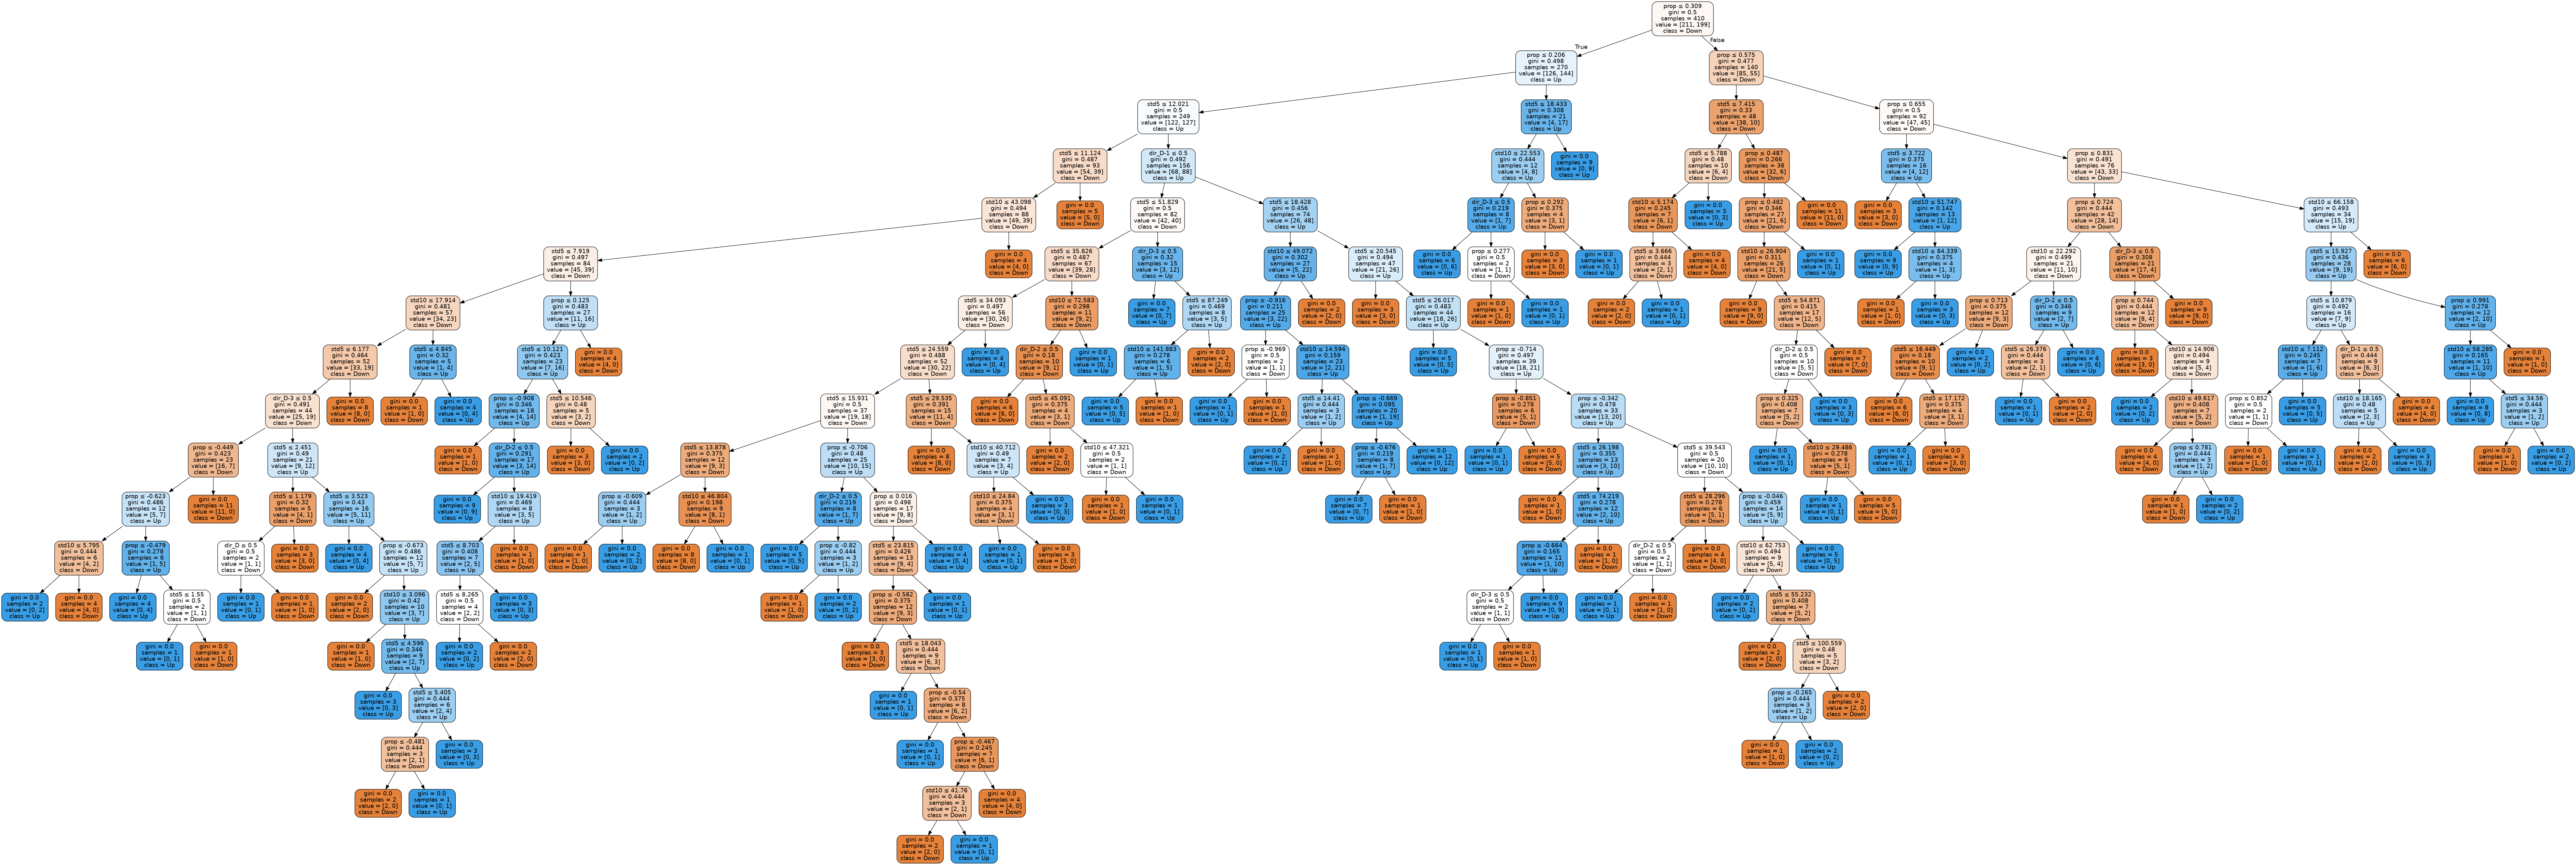

In [244]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(mod_arvore1
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = df1_filtrado.columns[10:df1.shape[1]]
                , class_names = ["Down","Up"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

#graph.write_png('arvore1.png')

Image(graph.create_png())

In [245]:
# Calculando a performance

df1_test1.loc[: , "Predicted"] = y_pred_test1

In [246]:
df1_test1["Predicted"].astype(str)

Date
2019-01-02      Up
2019-01-03    Down
2019-01-04      Up
2019-01-05    Down
2019-01-06      Up
              ... 
2022-08-29    Down
2022-08-30    Down
2022-08-31      Up
2022-09-01    Down
2022-09-02      Up
Name: Predicted, Length: 1340, dtype: object

In [284]:
# Ajustando o retorno em pips com o resultado do modelo

df1_test1.loc[: , "Ret_Pips"] = np.where(df1_test1.loc[: , 'Predicted'] == "Up" , df1_test1.loc[: , 'Pips'], '0')
df1_test1.loc[: , "Ret_Pips"] = np.where(df1_test1.loc[: , 'Predicted'] == "Down" , -1*df1_test1.loc[: , 'Pips'], df1_test1.loc[: , "Ret_Pips"])

In [285]:
# Convertendo para float

df1_test1.loc[: , "Ret_Pips"] = df1_test1["Ret_Pips"].astype(float)

In [286]:
df1_test1.loc[: , "Ret_Pips_Accumulated"] = df1_test1["Ret_Pips"].cumsum()

In [287]:
df1_test1.loc[: , "Ret_Pips_Accumulated"].tail()

Date
2022-08-29    4304.443863
2022-08-30    4334.289932
2022-08-31    4301.798111
2022-09-01    4310.754410
2022-09-02    4290.406631
Name: Ret_Pips_Accumulated, dtype: float64

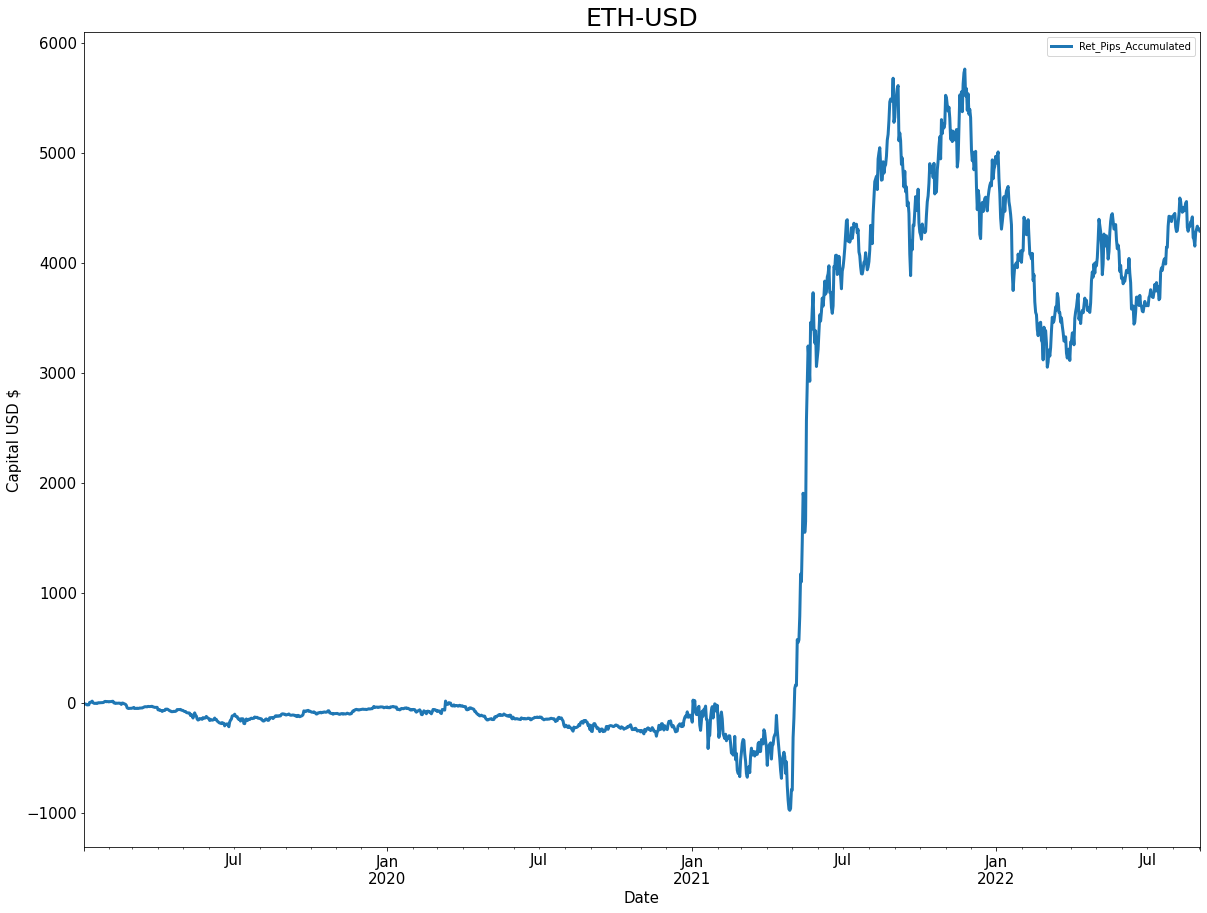

In [306]:
df1_test1["Ret_Pips_Accumulated"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15)
plt.xlabel('Date'
           , fontsize = 15);
plt.ylabel('Capital USD $'
           , fontsize = 15);
plt.title( str(ticker)
          , fontsize = 25);
plt.legend()

______________________________________________________

### Step 9 - Model Improvement

In [307]:
# Decision tree model training for the classification task

from sklearn.tree import DecisionTreeClassifier

mod_arvore1 = DecisionTreeClassifier(criterion = "gini", max_depth = 5)

mod_arvore1.fit(x_train1, y_train1) 

DecisionTreeClassifier(max_depth=5)

In [308]:
# Test Predictions

y_pred_test1 = mod_arvore1.predict(x_test1)

In [309]:
# Model accuracy

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test1, y_pred_test1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test1, y_pred_test1))

[[320 318]
 [322 380]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

        Down       0.50      0.50      0.50       638
          Up       0.54      0.54      0.54       702

    accuracy                           0.52      1340
   macro avg       0.52      0.52      0.52      1340
weighted avg       0.52      0.52      0.52      1340



In [310]:
# Model accuracy
import sklearn.metrics as metrics

print("Acuracia:", round(metrics.accuracy_score(y_test1, y_pred_test1),3)*100)

Acuracia: 52.2


In [311]:
# To visualize the decision tree follow the steps bellow:

# 1 - Check - https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi
# 2 - pip install graphviz & pydotplus


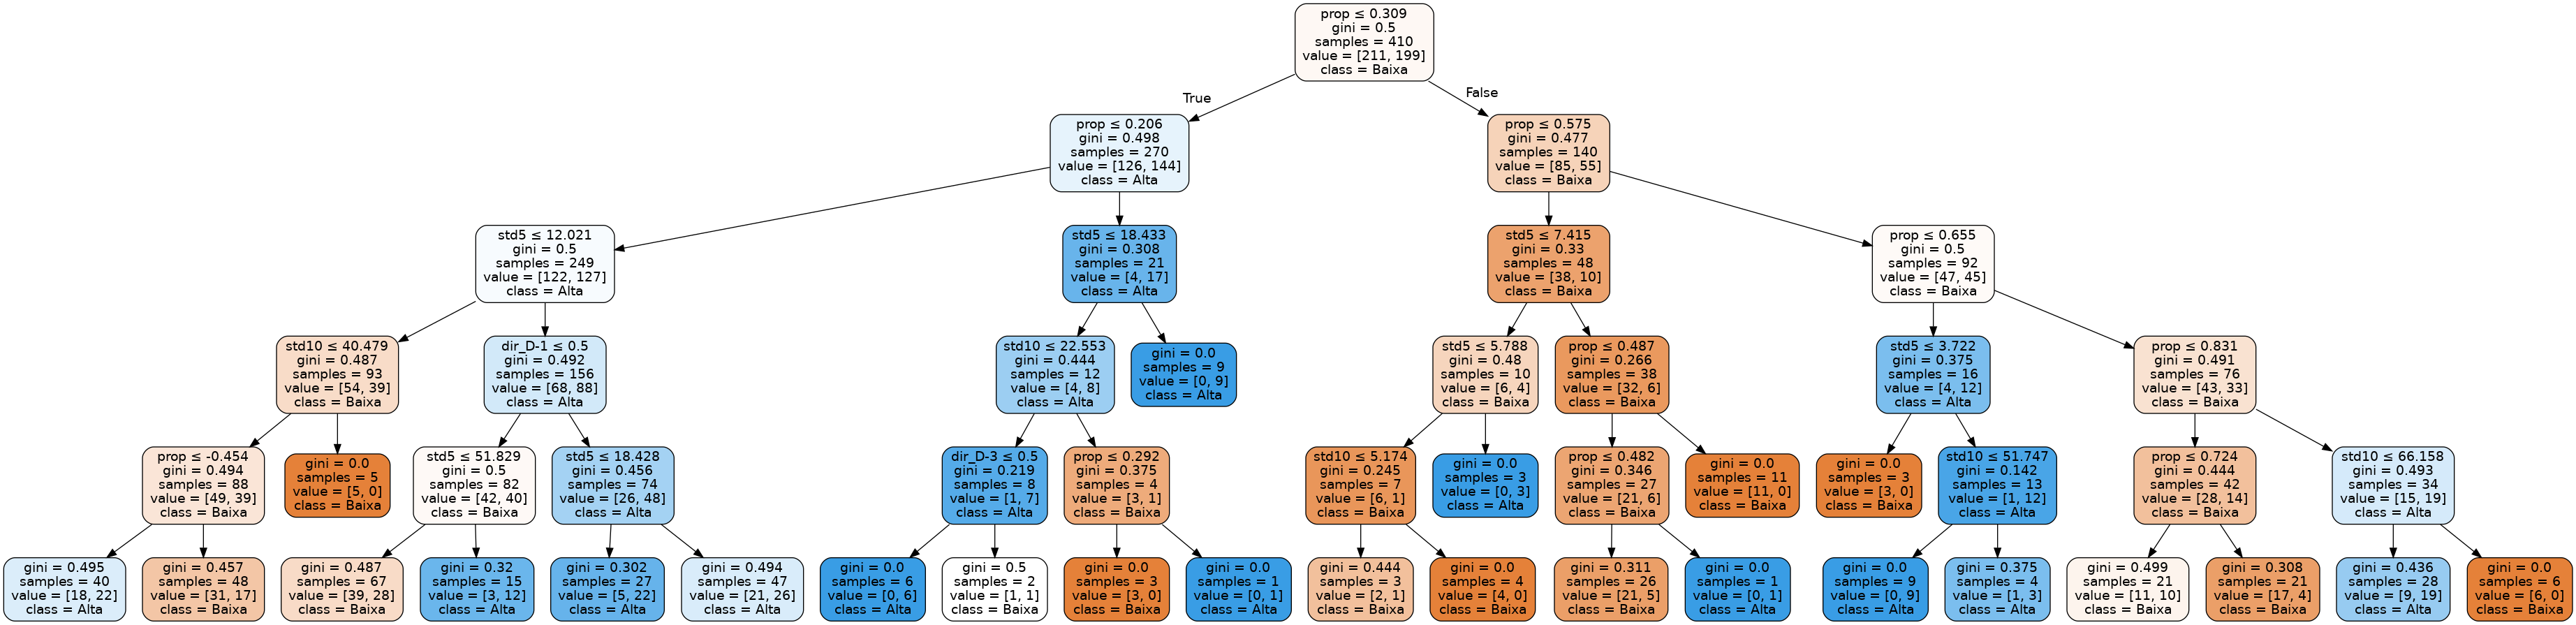

In [312]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(mod_arvore1
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = df1_filtrado.columns[10:df1.shape[1]]
                , class_names = ["Baixa","Alta"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('arvore2.png')

Image(graph.create_png())

In [313]:
# Calculating performance 

df1_test1.loc[: , "Predicted"] = y_pred_test1

In [314]:
df1_test1["Predicted"].astype(str)

Date
2019-01-02      Up
2019-01-03      Up
2019-01-04      Up
2019-01-05    Down
2019-01-06      Up
              ... 
2022-08-29    Down
2022-08-30      Up
2022-08-31    Down
2022-09-01    Down
2022-09-02      Up
Name: Predicted, Length: 1340, dtype: object

In [315]:
# Adjusting the pip return with the model result

df1_test1.loc[: , "Ret_Pips"] = np.where(df1_test1.loc[: , 'Predicted'] == "Up" , df1_test1.loc[: , 'Pips'], '0')
df1_test1.loc[: , "Ret_Pips"] = np.where(df1_test1.loc[: , 'Predicted'] == "Down" , -1*df1_test1.loc[: , 'Pips'], df1_test1.loc[: , "Ret_Pips"])

In [316]:
# Converting to float

df1_test1.loc[: , "Ret_Pips"] = df1_test1["Ret_Pips"].astype(float)

In [317]:
df1_test1.loc[: , "Ret_Pips_Accumulated"] = df1_test1["Ret_Pips"].cumsum()

In [318]:
df1_test1.loc[: , "Ret_Pips_Accumulated"].tail(50)

Date
2022-07-15    3407.595367
2022-07-16    3421.586090
2022-07-17    3661.668243
2022-07-18    3697.410919
2022-07-19    3674.636383
2022-07-20    3731.185211
2022-07-21    3770.529572
2022-07-22    3782.421906
2022-07-23    3732.242706
2022-07-24    3886.335968
2022-07-25    3882.759308
2022-07-26    4077.185211
2022-07-27    4166.420685
2022-07-28    4164.481842
2022-07-29    4133.044342
2022-07-30    4118.592194
2022-07-31    4164.913727
2022-08-01    4167.164093
2022-08-02    4181.235016
2022-08-03    4191.903717
2022-08-04    4067.854889
2022-08-05    4027.258331
2022-08-06    4034.951080
2022-08-07    4111.116364
2022-08-08    4183.607452
2022-08-09    4332.325104
2022-08-10    4302.843658
2022-08-11    4226.821320
2022-08-12    4202.731232
2022-08-13    4247.265778
2022-08-14    4214.691925
2022-08-15    4240.780670
2022-08-16    4285.920441
2022-08-17    4299.928619
2022-08-18    4065.908112
2022-08-19    4029.924591
2022-08-20    4072.239777
2022-08-21    4075.426666
2022-08

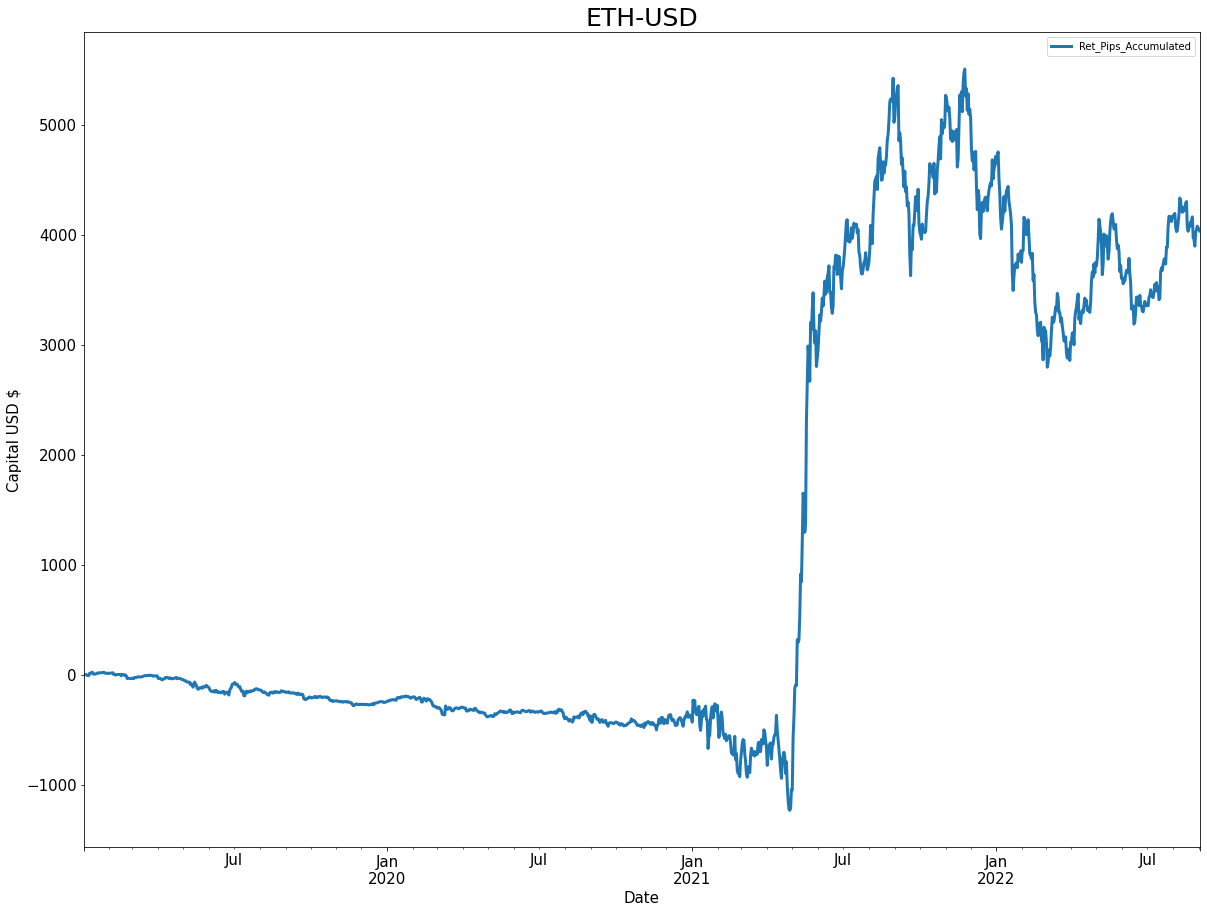

In [319]:
df1_test1["Ret_Pips_Accumulated"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15)
plt.xlabel('Date'
           , fontsize = 15);
plt.ylabel('Capital USD $'
           , fontsize = 15);
plt.title( str(ticker)
          , fontsize = 25);
plt.legend()

In [320]:
# Comparaçao com resultados aleatorios

df1_test1.loc[: , 'Random_Result'] = np.random.randint(0, 2, size = len(df1_test1)).astype(float)

df1_test1.loc[: , "Random_Result"] = np.where(df1_test1.loc[: , 'Random_Result'] == 1 , df1_test1.loc[: , 'Pips'], '0')
df1_test1.loc[: , "Random_Result"] = np.where(df1_test1.loc[: , 'Random_Result'] == 0 , -1*df1_test1.loc[: , 'Pips'], df1_test1.loc[: , "Random_Result"])

df1_test1.loc[: , "Random_Result"] = df1_test1["Random_Result"].astype(float).cumsum()

df1_test1.loc[: , 'Random_Result2'] = np.random.randint(0, 2, size = len(df1_test1)).astype(float)

df1_test1.loc[: , "Random_Result2"] = np.where(df1_test1.loc[: , 'Random_Result2'] == 1 , df1_test1.loc[: , 'Pips'], '0')
df1_test1.loc[: , "Random_Result2"] = np.where(df1_test1.loc[: , 'Random_Result2'] == 0 , -1*df1_test1.loc[: , 'Pips'], df1_test1.loc[: , "Random_Result2"])

df1_test1.loc[: , "Random_Result2"] = df1_test1["Random_Result2"].astype(float).cumsum()

In [321]:
df1_test1.loc[: , 'Random_Result'].tail()

Date
2022-08-29    36.854561
2022-08-30    66.700630
2022-08-31    66.700630
2022-09-01    57.744331
2022-09-02    57.744331
Name: Random_Result, dtype: float64

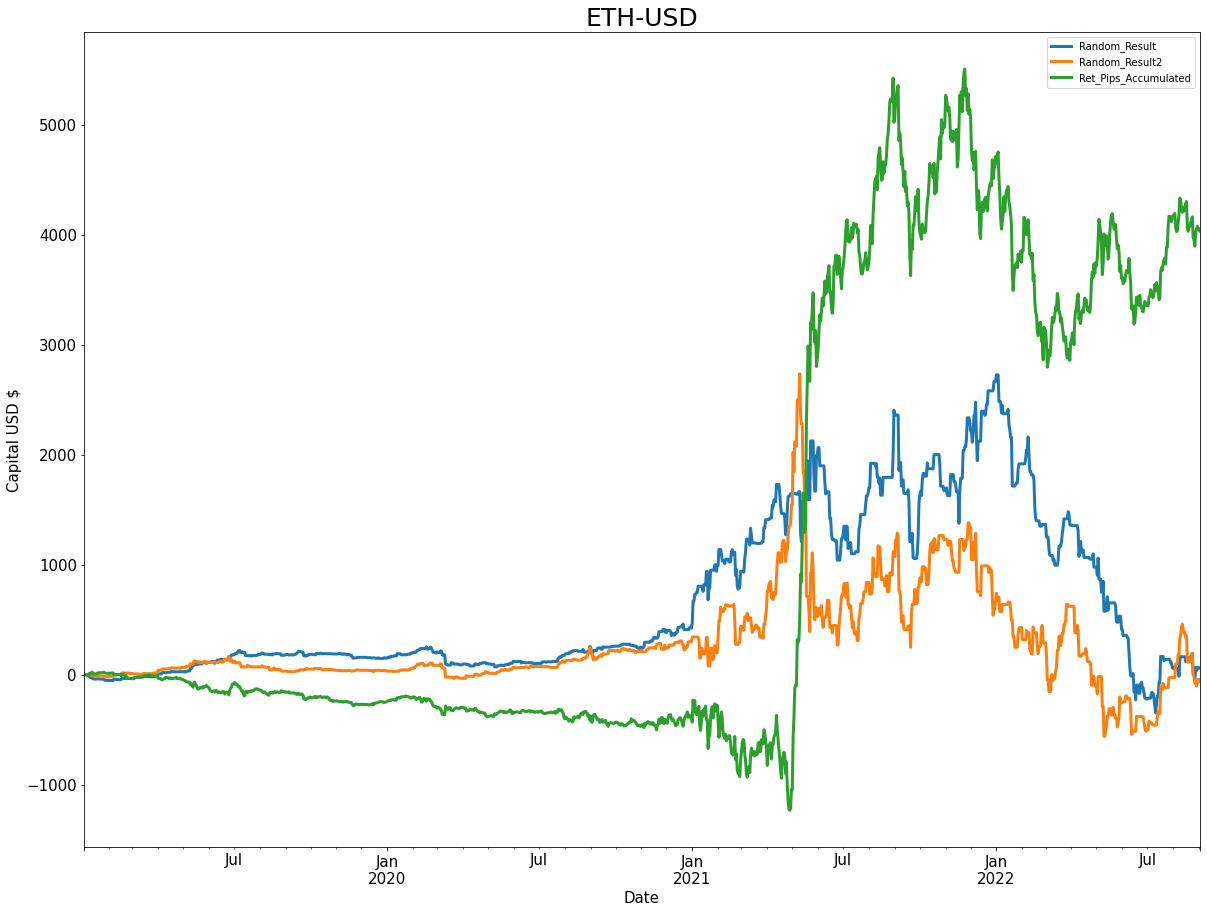

In [322]:
df1_test1["Random_Result"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15)
df1_test1["Random_Result2"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15)
df1_test1["Ret_Pips_Accumulated"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15)
plt.xlabel('Date'
           , fontsize = 15);
plt.ylabel('Capital USD $'
           , fontsize = 15);
plt.title( str(ticker)
          , fontsize = 25);
plt.legend()


______________________________________________________

In [323]:
#df1_test1.to_csv("resultados_arvore1.csv", index = True, header = True)

___________________________________________________